# Incident Copilot - Interactive Demo

This notebook demonstrates the **Incident Copilot** system - an intelligent multi-agent workflow for analyzing cybersecurity incidents in autonomous vehicles.


## Step 1: Setup and Configuration

Initialize the RAG configuration with Google Gemini and Pinecone.

In [1]:
# Import required libraries
import os
from configs.config import RAGConfig
from incident_copilot import IncidentCopilot
from configs.inputs import (
    COMPLETE_REPORT_CAN_BUS,
    COMPLETE_REPORT_GPS_SPOOFING,
    INCOMPLETE_REPORT_SUSPICIOUS_NETWORK
)

# Make sure API keys are set
print("Checking API keys...")
assert os.getenv('GEMINI_API_KEY'), "⚠️ GEMINI_API_KEY not set"
assert os.getenv('PINECONE_API_KEY'), "⚠️ PINECONE_API_KEY not set"
print("✓ API keys configured")

C:\Users\ofekg\anaconda3\envs\Cymotive\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Checking API keys...
✓ API keys configured


In [2]:
# Initialize configuration
print("Initializing RAG Configuration...\n")

config = RAGConfig(
    index_name="incident-reports",
    model="models/gemini-2.0-flash",
    embedding_model="models/text-embedding-004",
    embedding_dimension=768
)

print(f"✓ Model: {config.gemini_model}")
print(f"✓ Embedding Model: {config.embedding_model}")
print(f"✓ Pinecone Index: {config.index_name}")
print(f"✓ Vector Dimension: {config.embedding_dimension}")

Initializing RAG Configuration...

Successfully initialized model: models/gemini-2.0-flash
Using existing Pinecone index: incident-reports
✓ Model: genai.GenerativeModel(
    model_name='models/gemini-2.0-flash',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)
✓ Embedding Model: models/text-embedding-004
✓ Pinecone Index: incident-reports
✓ Vector Dimension: 768


## Step 2: Initialize the Incident Copilot

Create the copilot instance with all 7 specialized agents.

In [3]:
# Create copilot instance
copilot = IncidentCopilot(config)

Incident Copilot initialized with modular nodes!


## Step 3: Visualize the Workflow Graph

See how the agents are connected and how conditional routing works.

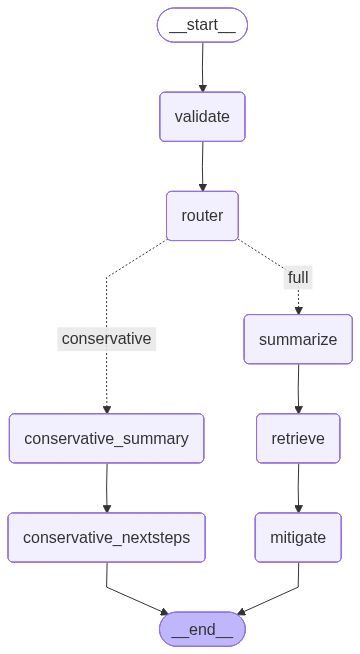

In [4]:
from IPython.display import Image, display

# Generate Mermaid diagram
graph_viz = copilot.visualize_graph()
display(Image(graph_viz))

---

# Test Results: Processing All Incident Reports

Process each of the three test incident reports from configs/inputs.py and display the final responses.

In [25]:
# Process the complete CAN Bus incident report
result_can_bus = copilot.process(
    incident_report=COMPLETE_REPORT_CAN_BUS,
    verbose=False
)

print("="*80)
print("EXAMPLE 1: CAN Bus DoS Attack (Complete Report)")
print("="*80)
print(f"Critical Info Missing: {result_can_bus['validation']['critical_info_missing']}")
print(f"Retrieved Incidents: {result_can_bus['metadata']['num_retrieved_incidents']}")
print(f"Retrieved Recommendations: {result_can_bus['metadata']['num_recommendations']}")
print("\n" + "="*80)
print("FINAL RESPONSE")
print("="*80)
print(result_can_bus['response'])


INCIDENT COPILOT
Processing incident report...


[Validation Agent] Extracting standard information...
[Validation Agent] Extracted information:
  WHO: Attacker using a commercially available CAN inject...
  WHAT: CAN Bus Denial-of-Service (DoS) attack via unautho...
  WHERE: Vehicle's internal network via compromised OBD-II ...
  WHEN: Detected on 2024-01-15 at 14:32 UTC....
  IMPACT: High severity; Multiple ECUs unresponsive, safety-...
  STATUS: Attack stopped, vehicle systems restored, root cau...
  Critical info missing: False

[Router] Checking critical information status...
[Router] Critical info missing: False
[Router] Routing to FULL path (complete summary + mitigation plan)

[Summarization Agent] Generating summary...
[Summarization Agent] Summary generated (443 chars)

[Retriever] Searching for similar incidents based on description...
[Retriever] Generating query embedding...
[Retriever] Querying similar incident descriptions...
[Retriever] Querying recommendations...

[Re

In [26]:
# Process the GPS spoofing incident report
result_gps = copilot.process(
    incident_report=COMPLETE_REPORT_GPS_SPOOFING,
    verbose=False
)

print("="*80)
print("EXAMPLE 2: GPS Spoofing Attack (Complete Report)")
print("="*80)
print(f"Critical Info Missing: {result_gps['validation']['critical_info_missing']}")
print(f"Retrieved Incidents: {result_gps['metadata']['num_retrieved_incidents']}")
print(f"Retrieved Recommendations: {result_gps['metadata']['num_recommendations']}")
print("\n" + "="*80)
print("FINAL RESPONSE")
print("="*80)
print(result_gps['response'])


INCIDENT COPILOT
Processing incident report...


[Validation Agent] Extracting standard information...
[Validation Agent] Extracted information:
  WHO: Attacker using Software-Defined Radio (SDR), auton...
  WHAT: GPS Spoofing Attack...
  WHERE: Vehicle's navigation system, stationary location a...
  WHEN: 2024-02-03 09:15 UTC, attack duration approximatel...
  IMPACT: Navigation system compromised, delivery route dela...
  STATUS: Resolved...
  Critical info missing: False

[Router] Checking critical information status...
[Router] Critical info missing: False
[Router] Routing to FULL path (complete summary + mitigation plan)

[Summarization Agent] Generating summary...
[Summarization Agent] Summary generated (625 chars)

[Retriever] Searching for similar incidents based on description...
[Retriever] Generating query embedding...
[Retriever] Querying similar incident descriptions...
[Retriever] Querying recommendations...

[Retriever] Found 3 similar incidents:

  [1] Incident ID: AV-

In [27]:
# Process the incomplete suspicious network activity report
result_incomplete = copilot.process(
    incident_report=INCOMPLETE_REPORT_SUSPICIOUS_NETWORK,
    verbose=False
)

print("="*80)
print("EXAMPLE 3: Suspicious Network Activity (Incomplete Report)")
print("="*80)
print(f"Critical Info Missing: {result_incomplete['validation']['critical_info_missing']}")
print(f"Retrieved Incidents: {result_incomplete['metadata']['num_retrieved_incidents']}")
print(f"Retrieved Recommendations: {result_incomplete['metadata']['num_recommendations']}")
print("\n" + "="*80)
print("FINAL RESPONSE")
print("="*80)
print(result_incomplete['response'])


INCIDENT COPILOT
Processing incident report...


[Validation Agent] Extracting standard information...
[Validation Agent] Extracted information:
  WHO: Autonomous vehicle, external IP address...
  WHAT: Suspicious network activity, communication with un...
  WHERE: Network...
  WHEN: Not specified...
  IMPACT: Unknown, potentially a security incident or config...
  STATUS: Under investigation, data collection ongoing...
  Critical info missing: True

[Router] Checking critical information status...
[Router] Critical info missing: True
[Router] Routing to CONSERVATIVE path (limited summary + basic next steps)

[Conservative Summary Agent] Generating faithful summary (critical info missing)...
[Conservative Summary Agent] Summary generated (450 chars)

[Conservative Next Steps Agent] Generating basic precautionary steps...
[Conservative Next Steps Agent] Next steps generated (2549 chars)
EXAMPLE 3: Suspicious Network Activity (Incomplete Report)
Critical Info Missing: True
Retrieved Inc